# Malaria Detection

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
import cv2
from PIL import Image
import os
print (os.listdir("input/cell_images"))

Using TensorFlow backend.


['Parasitized', 'Uninfected']


In [2]:
infected = os.listdir("input/cell_images/Parasitized/")
uninfected = os.listdir("input/cell_images/Uninfected/")

## Image Preprocessing

### Rotating and resizing the images to give more data
### Also appending the correct label to the images

In [3]:
data = []
labels = []

for i in infected:
    try:
    
        image = cv2.imread("input/cell_images/Parasitized/"+i)
        image_array = Image.fromarray(image , "RGB")
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(1)
        labels.append(1)
        labels.append(1)
        labels.append(1)
        
    except AttributeError:
        print("")
        
for u in uninfected:
    try:
        
        image = cv2.imread("input/cell_images/Uninfected/"+u)
        image_array = Image.fromarray(image , "RGB")
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        labels.append(0)
        labels.append(0)
        labels.append(0)
        
    except AttributeError:
        print("")

In [4]:
cells = np.array(data)
labels = np.array(labels)

np.save("Cells", cells)
np.save("Labels", labels)

In [5]:
print("Cells : {} | Labels : {}".format(cells.shape, labels.shape))

Cells : (96453, 50, 50, 3) | Labels : (96453,)


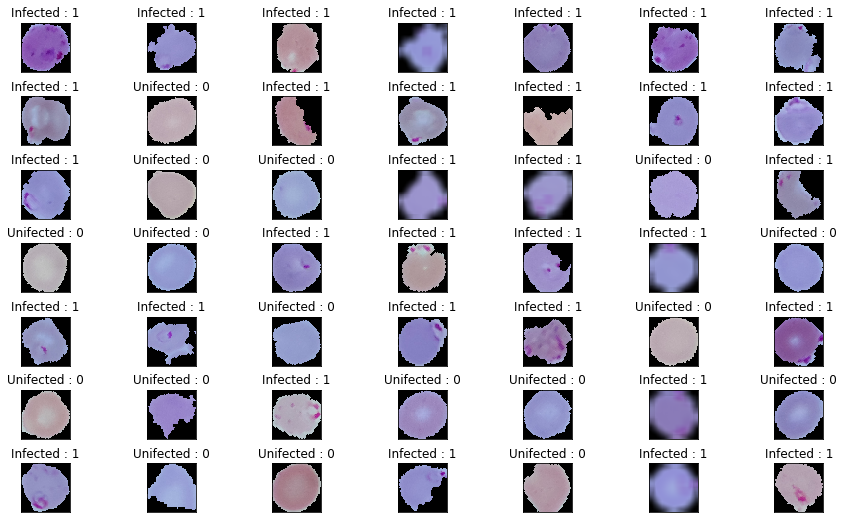

In [6]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , cells.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(cells[r[0]])
    plt.title('{} : {}'.format('Infected' if labels[r[0]] == 1 else 'Unifected' , labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

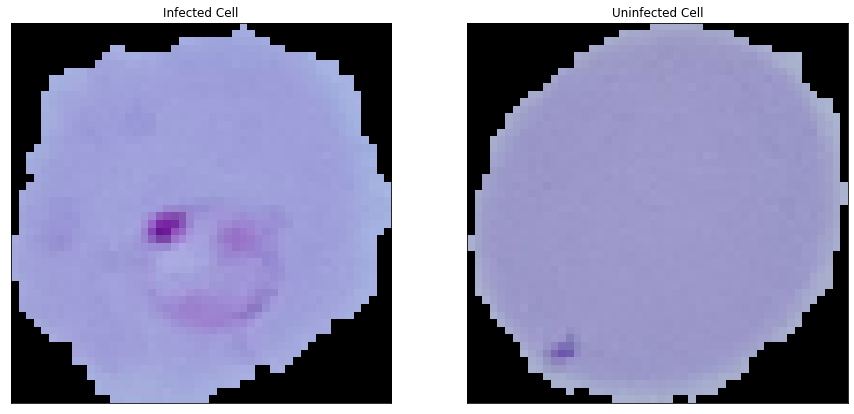

In [7]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cells[0])
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cells[60000])
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

#### Normalising the Data

In [8]:
n = np.arange(cells.shape[0])
np.random.shuffle(n)
cells = cells[n]
labels = labels[n]

In [9]:
cells = cells.astype(np.float32)
labels = labels.astype(np.int32)
cells = cells/255

#### Creating the Train, Test split and creating a graph to effectively show the split

In [10]:
train_x, test_X, train_y, test_Y = train_test_split(cells, labels, test_size = 0.2, random_state = 115)

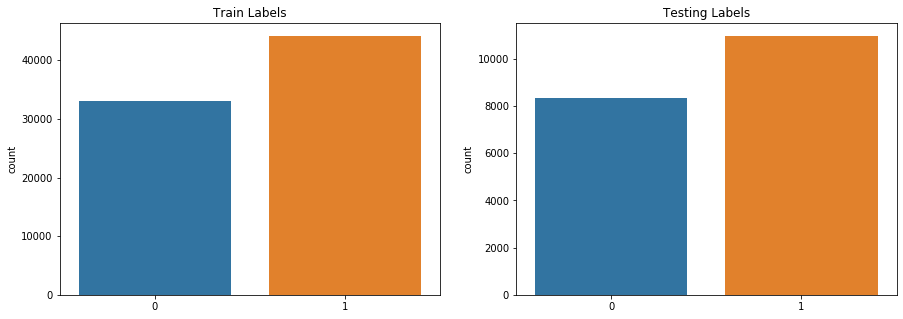

In [11]:
plt.figure(1, figsize = (15, 5))
n = 0

for z, j in zip([train_y, test_Y] , ["Train Labels", "Testing Labels"]):
    n += 1
    plt.subplot(1, 2, n)
    sns.countplot(x = z)
    plt.title(j)
    
plt.show()

In [12]:
print("train data shape {}, test data shape {}".format(train_x.shape, test_X.shape))

train data shape (77162, 50, 50, 3), test data shape (19291, 50, 50, 3)


In [13]:
num_classes=len(np.unique(labels))
train_y=keras.utils.to_categorical(train_y,num_classes)
test_Y=keras.utils.to_categorical(test_Y,num_classes)

# Model Creation

### Creation of the CNN using Keras with a TensorFlow Backend

In [14]:
CNN_model = Sequential()

CNN_model.add(Conv2D(filters=16, kernel_size=2, padding="same", activation="relu", input_shape=(50, 50, 3)))
CNN_model.add(MaxPooling2D(pool_size=2))
CNN_model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
CNN_model.add(MaxPooling2D(pool_size=2))
CNN_model.add(Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"))
CNN_model.add(MaxPooling2D(pool_size=2))
CNN_model.add(Dropout(0.2))
CNN_model.add(Flatten())
CNN_model.add(Dense(500, activation="relu"))
CNN_model.add(Dropout(0.2))
CNN_model.add(Dense(2, activation="softmax"))
CNN_model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
______________________________________

In [15]:
CNN_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
CNN_model.fit(train_x, train_y, batch_size=50, epochs=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
77162/77162 [==============================] - 91s 1ms/step - loss: 0.2500 - accuracy: 0.8907
Epoch 2/10
77162/77162 [==============================] - 84s 1ms/step - loss: 0.1241 - accuracy: 0.9598
Epoch 3/10
77162/77162 [==============================] - 93s 1ms/step - loss: 0.1106 - accuracy: 0.9633
Epoch 4/10
77162/77162 [==============================] - 88s 1ms/step - loss: 0.1012 - accuracy: 0.9662
Epoch 5/10
77162/77162 [==============================] - 88s 1ms/step - loss: 0.0947 - accuracy: 0.9682
Epoch 6/10
77162/77162 [==============================] - 83s 1ms/step - loss: 0.0881 - accuracy: 0.9699
Epoch 7/10
77162/77162 [==============================] - 90s 1ms/step - loss: 0.0830 - accuracy: 0.9712
Epoch 8/10
77162/77162 [==============================] - 83s 1ms/step - loss: 0.0788 - accuracy: 0.9726
Epoch 9/10
77162/77162 [==============================] - 83s 1ms

### Testing Model Accuracy and saving the model

In [17]:
pred_y = CNN_model.predict(test_X)
accuracy = CNN_model.evaluate(test_X, test_Y, verbose=1)
print("Test Accuracy:", accuracy[1])

19291/19291 [==============================] - 4s 201us/step
Test Accuracy: 0.9655798077583313


In [24]:
pred_y = pred_y.argmax(axis=1)
test_Y = test_Y.argmax(axis=1)

In [25]:
print('True', test_Y[0:25])
print('Pred', pred_y[0:25])

True [1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0]
Pred [1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0]


In [26]:
print(confusion_matrix(test_Y, pred_y))

[[ 8050   276]
 [  388 10577]]


#### Confusion matrix to show amount of True Positives (TP), True Negatives (TN), False Positives(FP) and Flase Negatives(FN) 

In [27]:
confusion = confusion_matrix(test_Y, pred_y)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[ 8050   276]
 [  388 10577]]


#### Sensitivity: When the actual value is positive, how often is the prediction correct? i.e. Recall Score

In [28]:
sensitivity = TP / float(FN + TP)

print(sensitivity)

0.9646146830825353


#### Specificity: When the actual value is negative, how often is the prediction correct?

In [29]:
specificity = TN / (TN + FP)

print(specificity)

0.9668508287292817


In [30]:
CNN_model.predict_proba(test_X)[0:10, 1]

array([9.9999976e-01, 9.9999988e-01, 1.7481849e-03, 7.0424569e-05,
       8.6396819e-01, 9.9999249e-01, 2.8985340e-05, 3.7019679e-06,
       9.9999964e-01, 3.5141720e-03], dtype=float32)

In [31]:
pred_y_prob = CNN_model.predict_proba(test_X)[:, 1]

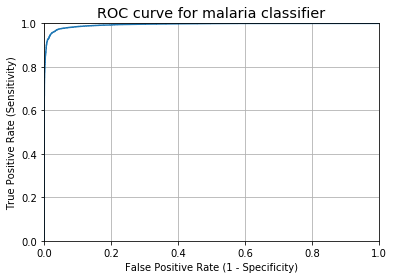

In [32]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(test_Y, pred_y_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for malaria classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [33]:
from sklearn import metrics
print(metrics.roc_auc_score(test_Y, pred_y_prob))

0.9936945168382924


In [44]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])
    
evaluate_threshold(0.5)

Sensitivity: 0.9646146830825353
Specificity: 0.9668508287292817


In [34]:
from keras.models import load_model
CNN_model.save("CNN_model.h5")